Question#1 (80 Marks): Use the Iris dataset iris.data file available at https://archivebeta.ics.uci.edu/ml/datasets/iris

In [3]:
import pandas as pd

URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(URL, names=['sepal length','sepal width', 'petal length', 'petal width','species'])

In [4]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


1- Take a quick look at the data structure:
a. Use head(), info(), and describe() (2.5 Marks)
b. Plot the relationship between the Sepal Length and Sepal Width (sample figure
shown below): (5 Marks)

In [5]:
#1a
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#1a
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#1a
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


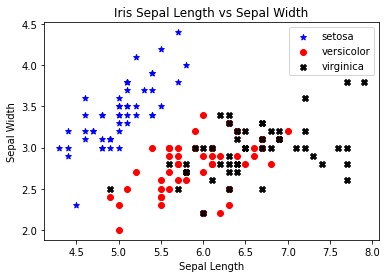

<Figure size 720x288 with 0 Axes>

In [8]:
#1b
import matplotlib.pyplot as plt

print(df['species'].unique())

setosa = df.loc[df['species'] == 'Iris-setosa']
versicolor = df.loc[df['species'] == 'Iris-versicolor']
virginica = df.loc[df['species'] == 'Iris-virginica']

plt.scatter(setosa['sepal length'], setosa['sepal width'], label='setosa', marker='*', color='b')
plt.scatter(versicolor['sepal length'], versicolor['sepal width'], label='versicolor', marker='o', color='r')
plt.scatter(virginica['sepal length'], virginica['sepal width'], label='virginica', marker='X', color='k')
plt.legend(loc='best')
plt.title('Iris Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.figure(figsize=(10,4))
plt.show()

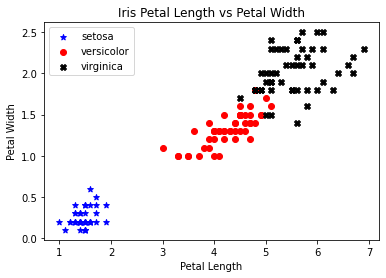

<Figure size 720x288 with 0 Axes>

In [9]:
#1b
plt.scatter(setosa['petal length'], setosa['petal width'], label='setosa', marker='*', color='b')
plt.scatter(versicolor['petal length'], versicolor['petal width'], label='versicolor', marker='o', color='r')
plt.scatter(virginica['petal length'], virginica['petal width'], label='virginica', marker='X', color='k')
plt.legend(loc='best')
plt.title('Iris Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.figure(figsize=(10,4))
plt.show()

2- Check if there are null values and fill them with the average value of that attribute if it is
numerical, and with the most common occurrence of that attribute if it is categorical
(2.5 Marks).

In [10]:
#2
df.isnull().sum()
# there are no null values

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

3- Split the data into 80% training set and 20% testing set, use the stratify option to ensure
you have all three classes represented in the training set (10 Marks).

In [11]:
#3
from sklearn.model_selection import train_test_split

key = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
X = df.iloc[:,df.columns != 'species']
y = df['species'].map(key)
SEED = 4

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=SEED, stratify=y)

4- Train a Support Vector Machine Classifier (SVC) to predict the species of the iris, with a
Polynomial Kernel. (10 Marks)

In [12]:
#4
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))

poly_kernel_svm_clf.fit(X_train, y_train)

poly_kernel_svm_clf.score(X_test, y_test)


y_pred = poly_kernel_svm_clf.predict(X_test)

y_pred_vs_test = pd.DataFrame({'Prediction':y_pred,'Actual':y_test})
print(y_pred_vs_test)

print(f'Prediction vs Actual Score: {poly_kernel_svm_clf.score(X_test, y_test)}')

     Prediction  Actual
68            1       1
8             0       0
53            1       1
92            1       1
147           2       2
23            0       0
72            2       1
40            0       0
49            0       0
57            1       1
115           2       2
30            0       0
113           2       2
59            1       1
5             0       0
110           2       2
39            0       0
138           2       2
9             0       0
100           2       2
143           2       2
1             0       0
61            1       1
107           2       2
140           2       2
89            1       1
46            0       0
73            1       1
122           2       2
56            1       1
Prediction vs Actual Score: 0.9666666666666667


5- Make predictions using cross-validation with cv=3.

In [13]:
#5
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cross_val_score(poly_kernel_svm_clf, X_train, y_train, cv=3)
y_predcv = cross_val_predict(poly_kernel_svm_clf, X_train, y_train, cv=3)

y_predcv_vs_train = pd.DataFrame({'Prediction':y_predcv,'Actual':y_train})
y_predcv_vs_train


,Prediction,Actual
137,2,2
109,2,2
64,1,1
103,2,2
101,2,2
...,...,...
11,0,0
94,1,1
0,0,0
104,2,2


6- Report on the following performance metrics (10 Marks)

accuracy score: 0.95


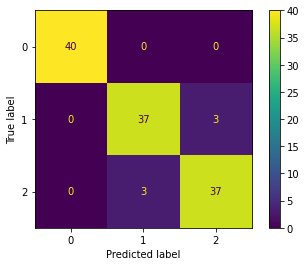

In [14]:
#6
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


ConfusionMatrixDisplay.from_predictions(y_train, y_predcv)

print(f'accuracy score: {accuracy_score(y_train, y_predcv)}')

7- Repeat steps 4 to 6 with a Gaussian RBF Kernel. (20 Marks)

In [15]:
#7-4
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

rbf_kernel_gaussian_process_clf = make_pipeline(StandardScaler(), GaussianProcessClassifier(kernel=kernel))

rbf_kernel_gaussian_process_clf.fit(X_train, y_train)

rbf_kernel_gaussian_process_clf.score(X_test, y_test)


y_pred_gprbf = rbf_kernel_gaussian_process_clf.predict(X_test)

y_pred_gprbf_vs_test = pd.DataFrame({'Prediction':y_pred_gprbf,'Actual':y_test})
print(y_pred_gprbf_vs_test)

print(f'Prediction vs Actual Score: {rbf_kernel_gaussian_process_clf.score(X_test, y_test)}')

     Prediction  Actual
68            2       1
8             0       0
53            1       1
92            1       1
147           2       2
23            0       0
72            2       1
40            0       0
49            0       0
57            1       1
115           2       2
30            0       0
113           2       2
59            1       1
5             0       0
110           2       2
39            0       0
138           2       2
9             0       0
100           2       2
143           2       2
1             0       0
61            1       1
107           2       2
140           2       2
89            1       1
46            0       0
73            1       1
122           2       2
56            1       1
Prediction vs Actual Score: 0.9333333333333333


In [16]:
#7-5
cross_val_score(rbf_kernel_gaussian_process_clf, X_train, y_train, cv=3)
y_predcv_gprbf = cross_val_predict(rbf_kernel_gaussian_process_clf, X_train, y_train, cv=3)

y_predcv_gprbf_vs_train = pd.DataFrame({'Prediction':y_predcv_gprbf,'Actual':y_train})
y_predcv_gprbf_vs_train

,Prediction,Actual
137,2,2
109,2,2
64,1,1
103,2,2
101,2,2
...,...,...
11,0,0
94,1,1
0,0,0
104,2,2


accuracy score: 0.9583333333333334


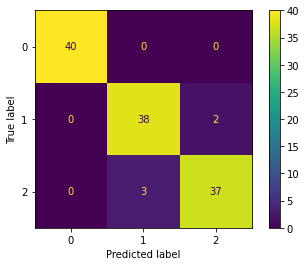

In [17]:
#7-6
ConfusionMatrixDisplay.from_predictions(y_train, y_predcv_gprbf)

print(f'accuracy score: {accuracy_score(y_train, y_predcv_gprbf)}')

8- Repeat steps 4 to 6 with a k-NN classifier and k=10. (20 Marks)


In [18]:
#8-4
from sklearn.neighbors import KNeighborsClassifier

knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))

knn_clf.fit(X_train, y_train)

knn_clf.score(X_test, y_test)


y_pred_knn = knn_clf.predict(X_test)

y_pred_knn_vs_test = pd.DataFrame({'Prediction':y_pred_knn,'Actual':y_test})
print(y_pred_knn_vs_test)

print(f'Prediction vs Actual Score: {knn_clf.score(X_test, y_test)}')

     Prediction  Actual
68            1       1
8             0       0
53            1       1
92            1       1
147           2       2
23            0       0
72            2       1
40            0       0
49            0       0
57            1       1
115           2       2
30            0       0
113           2       2
59            1       1
5             0       0
110           2       2
39            0       0
138           1       2
9             0       0
100           2       2
143           2       2
1             0       0
61            1       1
107           2       2
140           2       2
89            1       1
46            0       0
73            1       1
122           2       2
56            1       1
Prediction vs Actual Score: 0.9333333333333333


In [19]:
#8-5
cross_val_score(knn_clf, X_train, y_train, cv=3)
y_predcv_knn = cross_val_predict(knn_clf, X_train, y_train, cv=3)

y_predcv_knn_vs_train = pd.DataFrame({'Prediction':y_predcv_knn,'Actual':y_train})
y_predcv_knn_vs_train

,Prediction,Actual
137,2,2
109,2,2
64,1,1
103,2,2
101,2,2
...,...,...
11,0,0
94,1,1
0,0,0
104,2,2


accuracy score: 0.9583333333333334


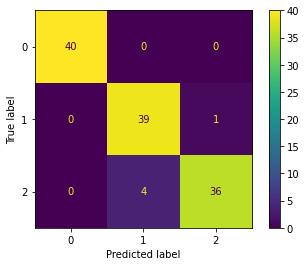

In [20]:
#8-6
ConfusionMatrixDisplay.from_predictions(y_train, y_predcv_knn)

print(f'accuracy score: {accuracy_score(y_train, y_predcv_knn)}')

Question#2 (20 Marks): Create a moons dataset with make_moons command, and choose
the number of samples and noise level.

1- Train a SVM classifier on the moons dataset you created. (10 Marks)

In [78]:
#1
from sklearn.datasets import make_moons
import numpy as np

X_moon, y_moon = make_moons(n_samples=1000, noise=0.1, random_state=4)

poly_kernel_svm_clf_moon = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf_moon.fit(X_moon, y_moon)
poly_kernel_svm_clf_moon.score

<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

2- Plot the dataset along the decision boundary. (10 Marks)

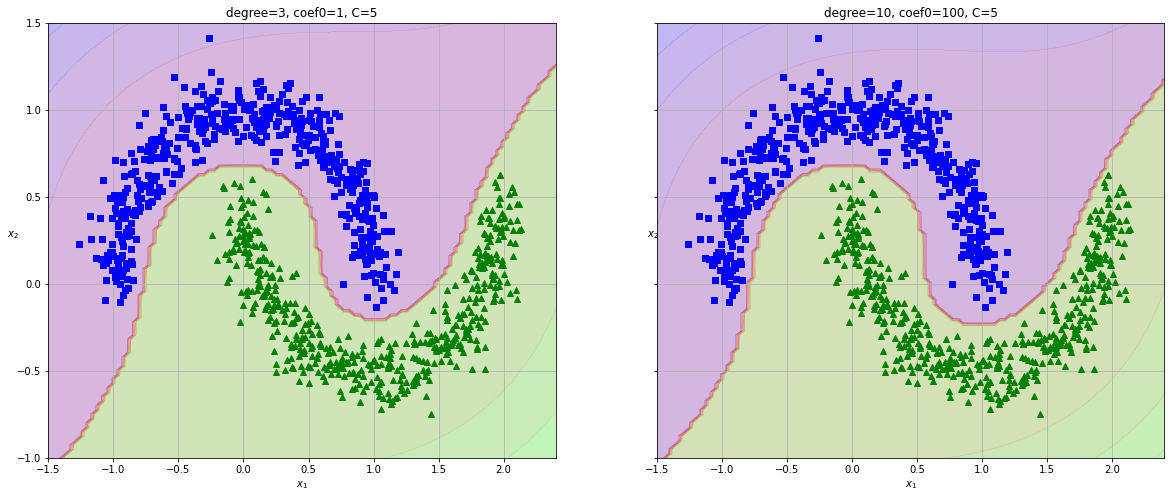

In [83]:
#2
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
  
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

poly100_kernel_svm_clf_moon = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=10, coef0=100, C=5))
poly100_kernel_svm_clf_moon.fit(X_moon, y_moon)

fig, axes = plt.subplots(ncols=2, figsize=(20, 8), sharex=True, sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf_moon, [-1.5, 2.45, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf_moon, [-1.5, 2.45, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")

plt.show()

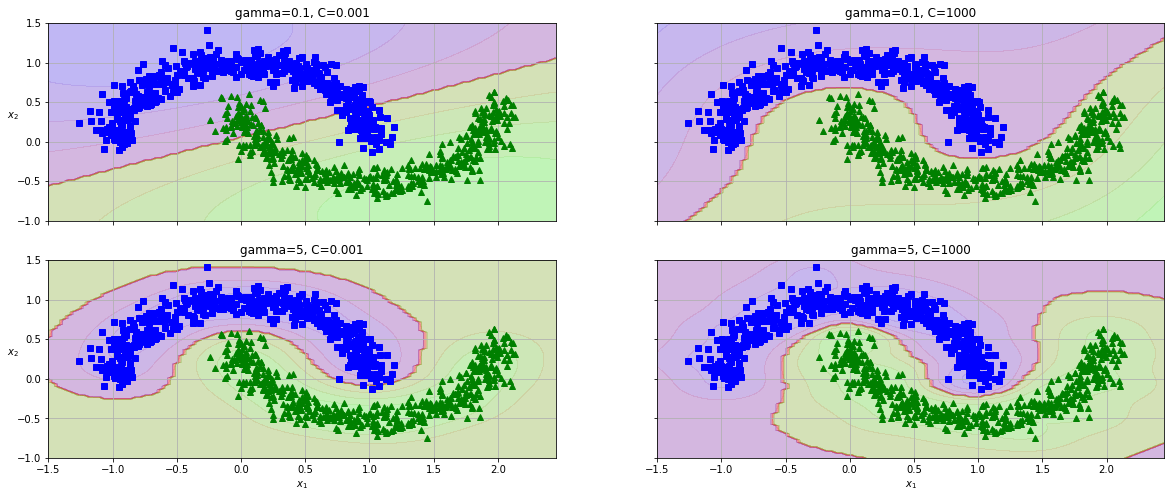

In [87]:
#2
G1, G2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (G1, C1), (G1, C2), (G2, C1), (G2, C2)

models = []

for g, c in hyperparams:
  rbf_kernel_svm_clf_moon = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=g, C=c))
  rbf_kernel_svm_clf_moon.fit(X_moon, y_moon)
  models.append(rbf_kernel_svm_clf_moon)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8), sharex=True, sharey=True)

for i, model in enumerate(models):
  plt.sca(axes[i // 2, i % 2])
  plot_predictions(model, [-1.5, 2.45, -1, 1.5])
  plot_dataset(X_moon, y_moon, [-1.5, 2.45, -1, 1.5])
  G, C = hyperparams[i]
  plt.title(f"gamma={G}, C={C}")
  if i in (0, 1):
        plt.xlabel("")
  if i in (1, 3):
        plt.ylabel("")
plt.show()

**References**

handson-ml3/05_support_vector_machines.ipynb at main · ageron/handson-ml3. (n.d.). GitHub. Retrieved October 23, 2022, from https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb